<a href="https://colab.research.google.com/github/afdmoraes/GEOSelper/blob/main/Notebook-13_Tarefa_da_Semana_4_Exemplo_de_solu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa da Semana 4 - Exemplo de solução
---

**Atividades**

Dadas 2 imagens pancromáticas da mesma região, registradas, com diferença temporal de aproximadamente 3 anos, realize uma análise de mudança da cobertura do solo:
* [CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif](https://drive.google.com/file/d/14roAvy251WSHph6r4_7TDiqGkFPwFxmg/view?usp=sharing) (imagem $t_1$, Julho de 2015)
* [CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif](https://drive.google.com/file/d/1rrNcCGr3Ob2LaWtW8SP17RF6hxZJW3hw/view?usp=sharing) (imagem $t_2$, Setembro de 2018)

**(a)** abra as 2 imagens utilizando a GDAL, e gere uma visualização de cada imagem e de seu histograma

Text(0.5, 1.0, 'Histograma $t_2$')

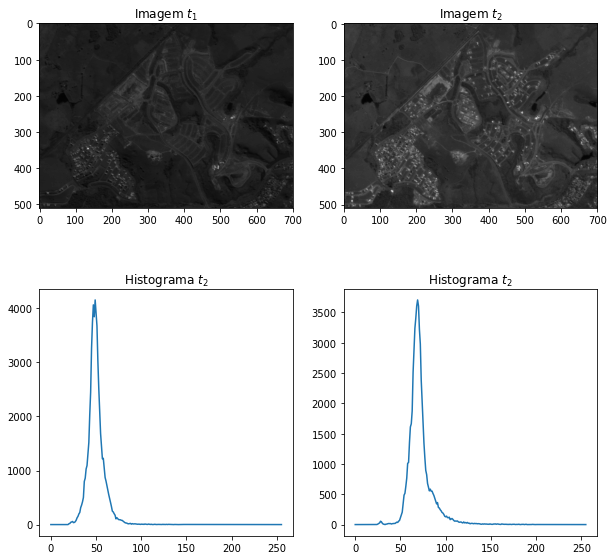

In [ ]:
# importar a biblioteca gdal e a matplotlib
from osgeo import gdal
import matplotlib.pyplot as plt

# informar o uso de excecoes
gdal.UseExceptions()

# abrir as imagens
dataset_t1 = gdal.Open("CBERS_4_PAN5M_20150712_154_126_L4_BAND1_crop.tif", gdal.GA_ReadOnly)
dataset_t2 = gdal.Open("CBERS_4_PAN5M_20180924_154_126_L4_BAND1_crop.tif", gdal.GA_ReadOnly)

# obter as bandas dos datasets
banda_t1 = dataset_t1.GetRasterBand(1)
banda_t2 = dataset_t2.GetRasterBand(1)

# obter as matrizes de pixels das bandas
matriz_t1 = banda_t1.ReadAsArray().astype(int)
matriz_t2 = banda_t2.ReadAsArray().astype(int)

# plotar as imagens e os histogramas
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(matriz_t1, cmap='gray')
plt.title(r'Imagem $t_1$')
plt.subplot(222)
plt.imshow(matriz_t2, cmap='gray')
plt.title(r'Imagem $t_2$')
plt.subplot(223)
plt.plot(banda_t1.GetHistogram())
plt.title(r'Histograma $t_2$')
plt.subplot(224)
plt.plot(banda_t2.GetHistogram())
plt.title(r'Histograma $t_2$')

**(b)** crie uma nova matriz `delta = t2 - t1` utilizando os operadores aritméticos da NumPy. Gere uma visualização desta matriz, e apresente um *scatterplot* contendo como eixos, as imagens $t_1, t_2$. 

**Observação:** Veja que a imagem $t_1$ possui uma linha a mais que a imagem $t_2$. Você precisará ajustar a imagem $t_1$ descartando a última linha.

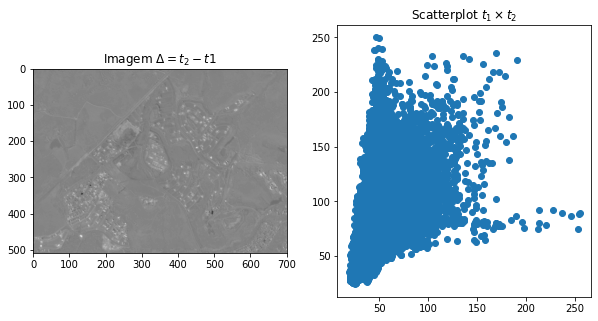

In [ ]:
# ajustar a matriz_t1, removendo a ultima linha
linhas = matriz_t1.shape[0]
matriz_t1_ajustada = matriz_t1.copy()[0:linhas-1, :]

# criar a matriz delta, a partir do calculo t2 - t1
matriz_delta = matriz_t2 - matriz_t1_ajustada
vetor_t1 = matriz_t1_ajustada.flatten()
vetor_t2 = matriz_t2.flatten()

# plotar a imagem e o scatterplot
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(matriz_delta, cmap='gray')
plt.title(r'Imagem $\Delta = t_2 - t1$')
plt.subplot(122)
plt.scatter(vetor_t1, vetor_t2)
plt.title(r'Scatterplot $t_1 \times t_2$');

**(c)** verifique os limites mínimos e máximos da matriz resultante, e defina um intervalo de pixels que você considera como `mudança` e um intervalo que considera como `não mudança`. A partir destes intervalos, gere uma visualização de uma classificação de `mudança` *versus* `não mudança`.

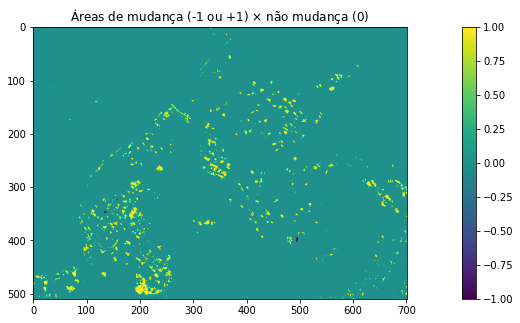

In [ ]:
import numpy as np

# podemos usar o metodo where para consultar
# os pixels dentro e fora do intervalo
limiar = 50
classificacao = np.where(matriz_delta > limiar, 1, 
                         np.where(matriz_delta < -limiar, -1, 0))

# visualizar a classificacao
plt.figure(figsize=(20, 5))
plt.imshow(classificacao)
plt.colorbar()
plt.title(r'Mudança (-1 ou +1) $\times$ Não mudança (0)');

plt.figure()
plt.hist(matriz_delta.flatten(), bins=100)